In [1]:
import datetime
import traceback

import pandas as pd
import requests
from matplotlib import pyplot as plt
from pandas import DataFrame

In [2]:
"""Рисование графика"""
def draw_plot(data: DataFrame):
    plt.plot(data['Date'], data['Value'])
    plt.xticks(rotation=90)

"""Функция получения данных"""
def get_data(currency: str, date_start: datetime.datetime, date_end: datetime.datetime) -> DataFrame:
    try:
        response = requests.get(
            f'https://cbr.ru/scripts/XML_dynamic.asp?date_req1={date_start.strftime("%d/%m/%Y")}&date_req2={date_end.strftime("%d/%m/%Y")}&VAL_NM_RQ={currency}')
    except ConnectionError as exc:
        print(traceback.format_exc())
    if response.status_code == requests.codes.ok:
        data = pd.read_xml(response.content)
        data['Value'] = data['Value'].apply(lambda x:x.replace(',', '.')) # замена запятых точками
        data['Value'] = pd.to_numeric(data['Value'])
        data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')
        return data
    else:
        response.raise_for_status()

"""Функция вывода данных по месяцам"""
def get_plot_by_month(data):
    grouped_data = data.groupby(pd.Grouper(key='Date', freq='M'))['Value'].mean()
    plt.plot(grouped_data.index, grouped_data.values)
    plt.xticks(rotation=90)

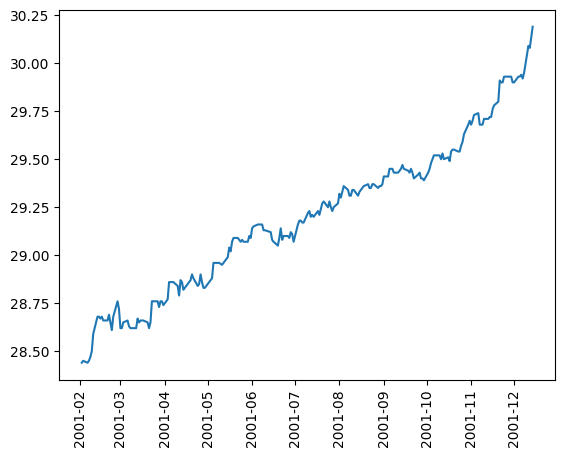

In [3]:
df = get_data('R01235', datetime.datetime.strptime('02.02.2001', '%d.%m.%Y'), datetime.datetime.strptime('14.12.2001', '%d.%m.%Y'))
draw_plot(df)

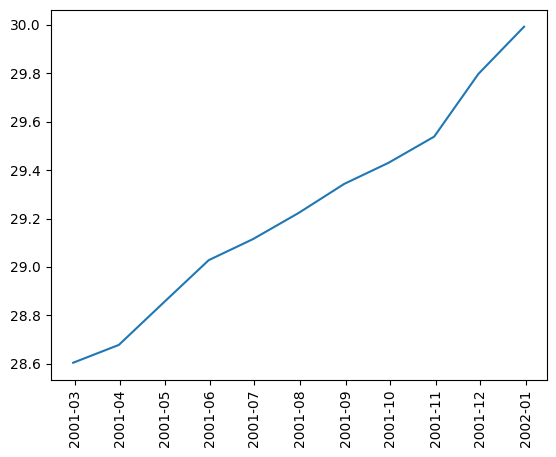

In [4]:
get_plot_by_month(df)

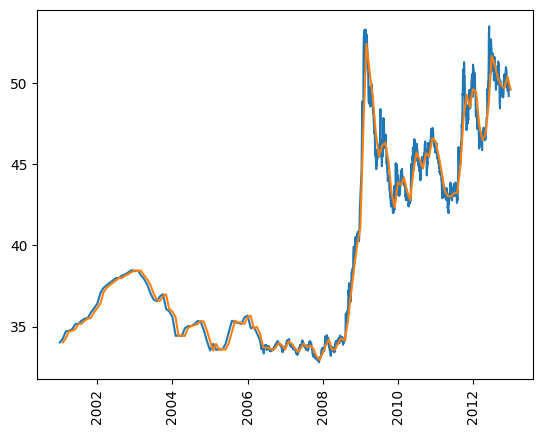

In [5]:
cny = get_data('R01375', datetime.datetime.strptime('01.01.2001', '%d.%m.%Y'), datetime.datetime.strptime('12.12.2012', '%d.%m.%Y'))
draw_plot(cny)
get_plot_by_month(cny)